# Aprendizado Não-Supervisionado (Clustering)

## K-Means Clustering

In [2]:
# importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('store.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
colunas = ['IdCliente', 'Genero', 'Idade', 'Renda Anual',
       'Nivel de Gasto (1-100)']

In [7]:
data.columns = colunas

In [8]:
# colunas traduzidas
data.columns

Index(['IdCliente', 'Genero', 'Idade', 'Renda Anual',
       'Nivel de Gasto (1-100)'],
      dtype='object')

In [9]:
data.set_index('IdCliente', inplace=True)

,Genero,Idade,Renda Anual,Nivel de Gasto (1-100)
IdCliente,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [11]:
df = data[['Renda Anual', 'Nivel de Gasto (1-100)']]

In [12]:
df.head()

,Renda Anual,Nivel de Gasto (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


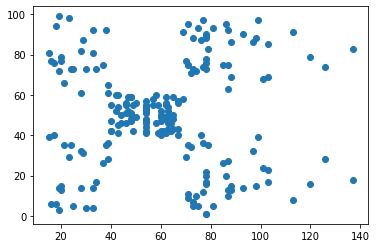

In [13]:
plt.scatter(df['Renda Anual'], df['Nivel de Gasto (1-100)'])
plt.show()

## Identificar Quantidade de Clusters

Método Elbow (Cotovelo).

In [14]:
from sklearn.cluster import KMeans

In [16]:
X = df.values

In [19]:
X.shape

(200, 2)

C:\Users\Leonardo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


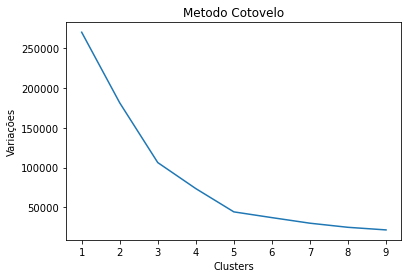

In [22]:
variacoes = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)
    
plt.plot(range(1,10), variacoes)
plt.title('Metodo Cotovelo')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()

In [23]:
kmeans_final = KMeans(n_clusters=5)

In [25]:
kmeans_final.fit(X)

KMeans(n_clusters=5)

In [26]:
cluster_pred = kmeans_final.predict(X)

In [27]:
cluster_centro = kmeans_final.cluster_centers_

In [28]:
# Selecionar elementos relacionados com a predição 
# com o cluster 0
X[cluster_pred==0, 0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137],
      dtype=int64)

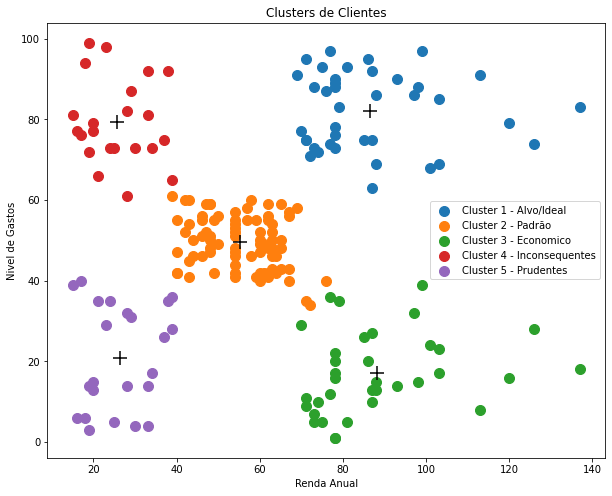

In [43]:
plt.figure(figsize=(10,8))

# plotando os clusters
plt.scatter(X[cluster_pred==0, 0], X[cluster_pred==0, 1], label="Cluster 1 - Alvo/Ideal", s=100)
plt.scatter(X[cluster_pred==1, 0], X[cluster_pred==1, 1], label="Cluster 2 - Padrão", s=100)
plt.scatter(X[cluster_pred==2, 0], X[cluster_pred==2, 1], label="Cluster 3 - Economico", s=100)
plt.scatter(X[cluster_pred==3, 0], X[cluster_pred==3, 1], label="Cluster 4 - Inconsequentes", s=100)
plt.scatter(X[cluster_pred==4, 0], X[cluster_pred==4, 1], label="Cluster 5 - Prudentes", s=100)

# plotando os centroides dos clusters
plt.scatter(cluster_centro[:, 0], cluster_centro[:, 1], marker='+', \
           s=200, c='black')

# configurando plot
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nivel de Gastos')
plt.legend()
plt.show()